# Exploratory Analysis

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- from a `seller_id`...
- and leaves a `review_id`...
- all this belonging to an `order_id`

## Import modules

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
root_path = os.path.join(os.getcwd(),'..')
if root_path not in sys.path:
    sys.path.append(root_path)

from utils.data import Olist

olist_instance = Olist()
data = olist_instance.get_data()

## Running an automated exploratory analysis with [ydata-profiling](https://github.com/ydataai/ydata-profiling)

In [3]:
datasets_to_profile = ['orders', 'products', 'sellers',
                       'customers', 'order_reviews', 'order_items']

In [4]:
for d in datasets_to_profile:
    print('Exporting: '+ d)
    profile = ProfileReport(data[d], title = d)
    profile.to_file(os.path.join(root_path, 'data', 'reports', f'{d}_report.html'))

Exporting: orders


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: products


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: sellers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: customers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: order_reviews


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: order_items


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Investigating the cardinalities of the various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customer` are there ?**  

In [5]:
aggregates = np.array([
    [
        data["orders"]['order_id'].nunique(),
        data["order_reviews"]['review_id'].nunique(),
        data["sellers"]['seller_id'].nunique(),
        data["products"]['product_id'].nunique(),
        data["customers"]['customer_id'].nunique(),
    ],
    [
        data["orders"]['order_id'].count(),
        data["order_reviews"]['review_id'].count(),
        data["sellers"]['seller_id'].count(),
        data["products"]['product_id'].count(),
        data["customers"]['customer_id'].count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
             columns=['nunique', 'count', 'ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


❓ **How many reviews is there per order? Are there reviews for all orders ?**


In [6]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]

orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head()

,customer_id,order_id,review_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,e73b67b67587f7644d5bd1a52deb1b01
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,359d03e676b3c069f62cadba8dd3f6e8
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,e50934924e227544ba8246aeb3770dd4


In [7]:
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

✅**Nearly all orders have a review, with only 768 out of 100,000 missing one (less than 0.7% missing).**

❓ **How many reviews are there per order?**


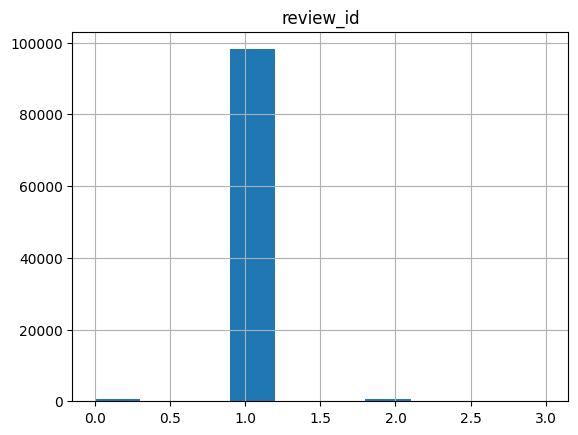

In [8]:
%matplotlib inline
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

✅ **Nearly all orders have only one review per customer.**

## Orders vs. Reviews

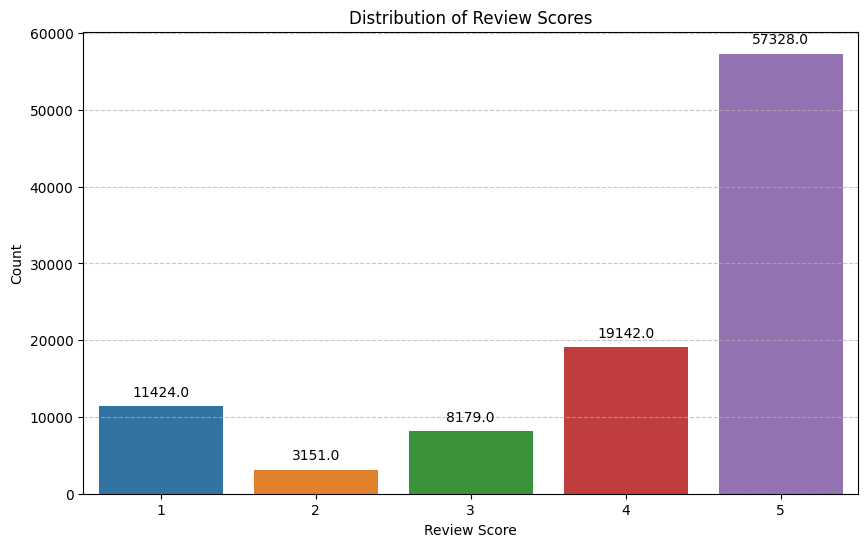

In [9]:
plt.figure(figsize=(10,6))

ax = sns.countplot(x='review_score', data=data['order_reviews'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

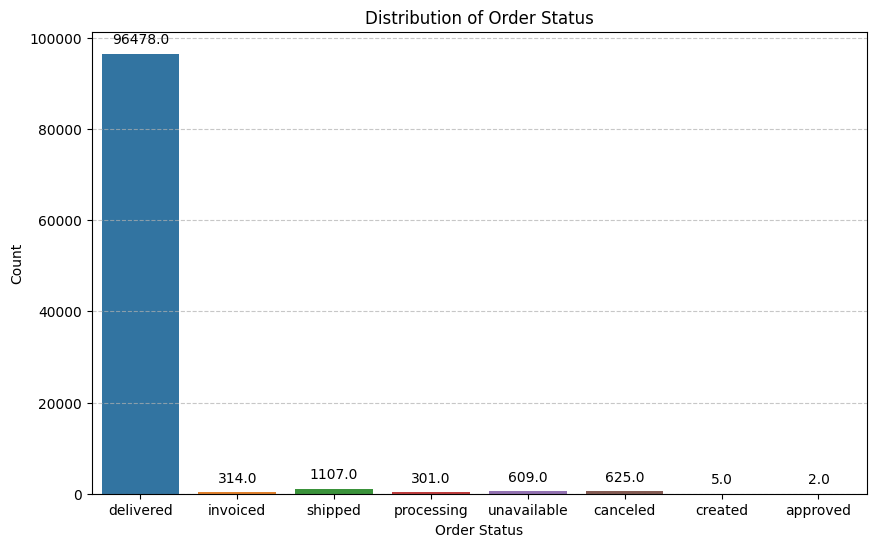

In [10]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=data['orders'], x='order_status')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

## Evolution of key business metrics from February 2017 to September 2018

### Metric 1: Order numbers
❓ **How business is going on a weekly basis?**

In [11]:
orders = data['orders'].copy()
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders.set_index('order_purchase_timestamp').sort_index()

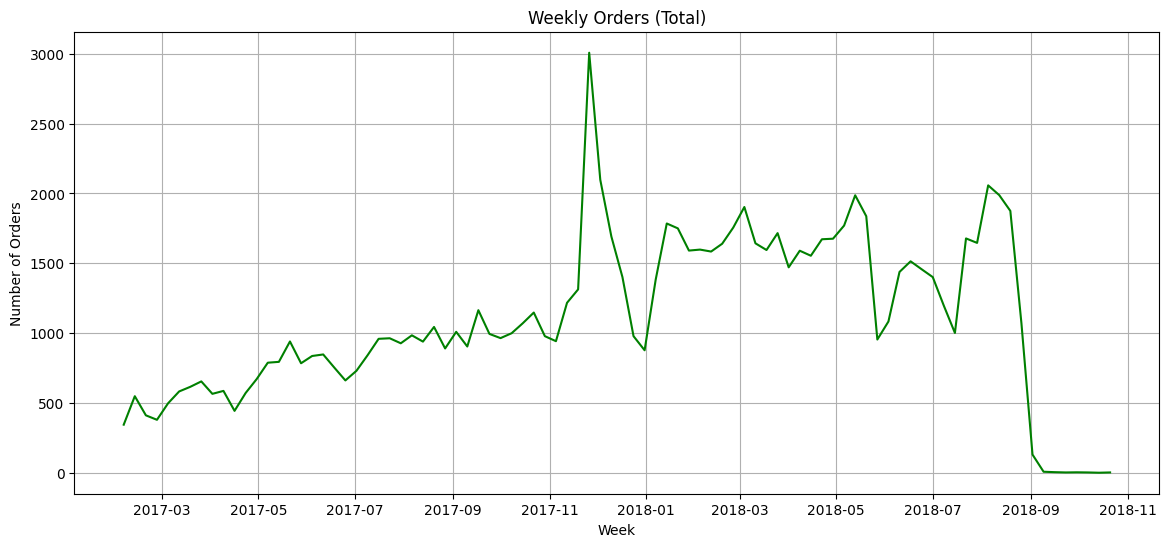

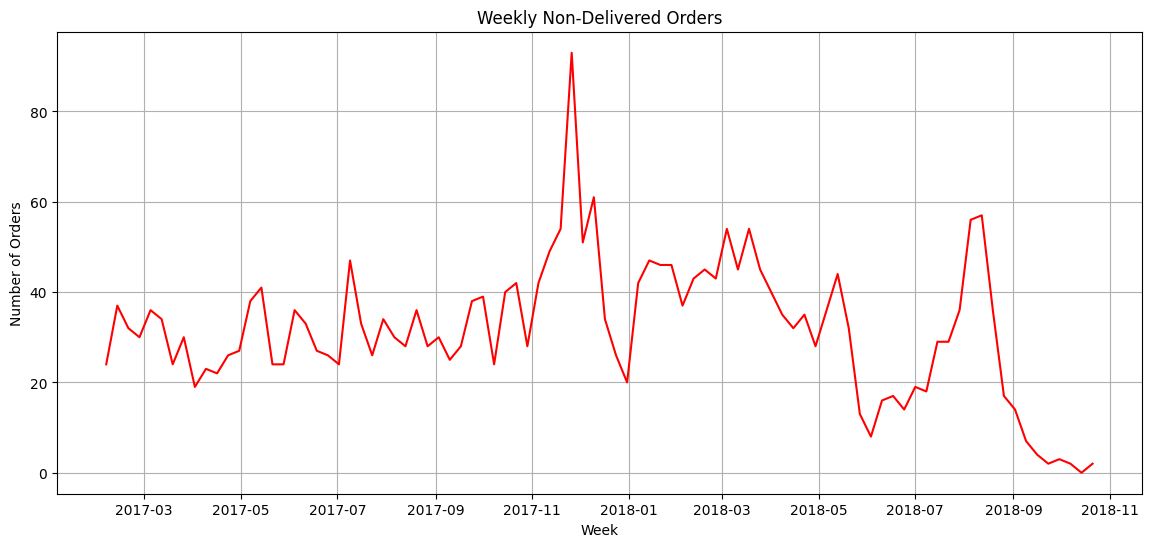

In [12]:
# Plot weekly total orders
plt.figure(figsize=(14, 6))
weekly_orders_total = orders['2017-02-01':].resample('W')['order_id'].count()
plt.plot(weekly_orders_total, color='g')
plt.title('Weekly Orders (Total)')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Plot weekly non-delivered orders
plt.figure(figsize=(14, 6))
non_delivered_orders = orders.query("order_status != 'delivered'").loc['2017-02-01':]
weekly_non_delivered_orders = non_delivered_orders.resample('W')['order_id'].count()
plt.plot(weekly_non_delivered_orders, color='r')
plt.title('Weekly Non-Delivered Orders')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

✅ **There seems to be some correlation between the number of orders and number of non-deliveries, but it is not fully conclusive.**

❓ **What does the visualization of the approximate weekly revenues of Olist look like (weekly sum of `payment_value` in `BRL`)?**

In [13]:
order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]
order_ids_payments.rename(columns={'payment_value': 'order_payment_value'}, inplace=True)

orders_payments = data['orders'].merge(order_ids_payments, on='order_id')

In [14]:
for col in ['order_purchase_timestamp', 'order_approved_at', \
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    orders_payments[col] = pd.to_datetime(orders_payments[col])
orders_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62


In [15]:
weekly_orders_payments = orders_payments.set_index('order_purchase_timestamp').resample('W')

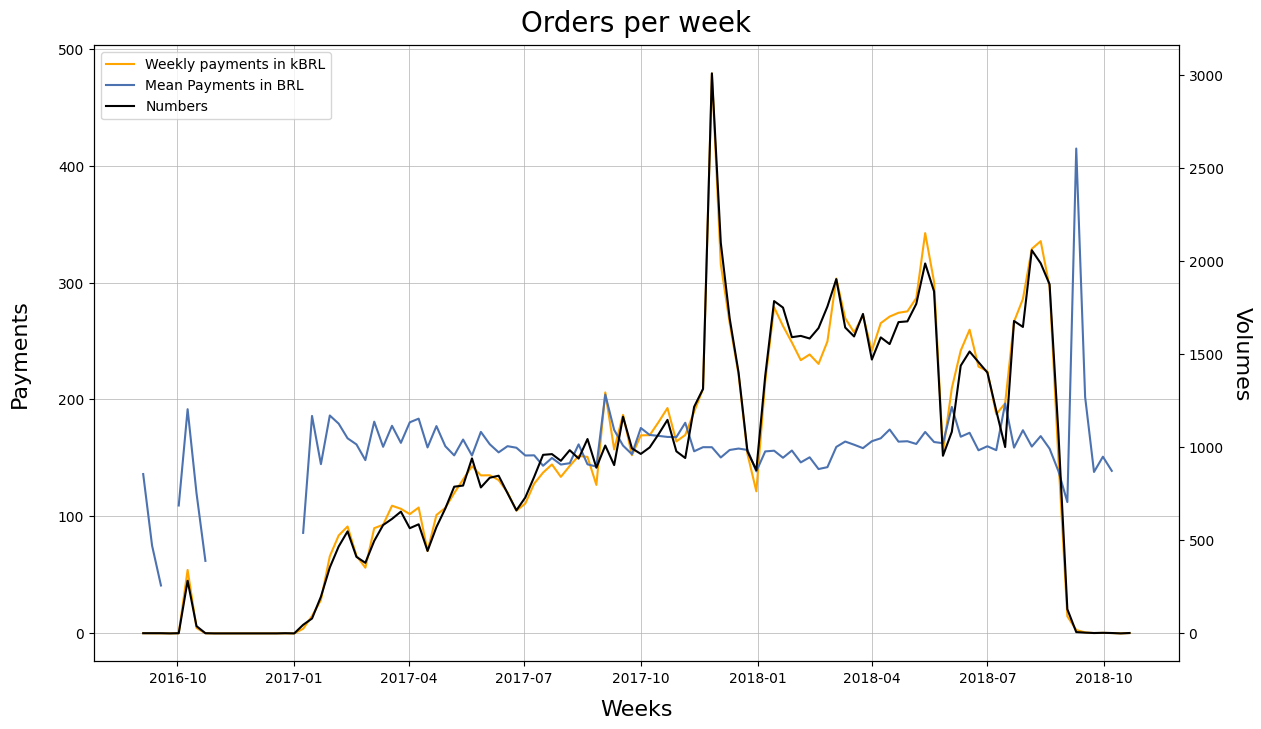

In [16]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # Weekly payments and Mean Payments
    ax1.plot(weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000),
             color="orange",
             label="Weekly payments in kBRL")
    ax1.plot(weekly_orders_payments.mean()['order_payment_value'],
             label="Mean Payments in BRL")
    ax1.set_xlabel("Weeks",
                   fontsize = 16,
                   labelpad = 10)
    ax1.set_ylabel("Payments",
                   fontsize = 16,
                   labelpad = 20)

    # Numbers
    ax2.plot(weekly_orders_payments.count()['order_id'],
             label="Numbers",
             c="black")
    ax2.set_ylabel("Volumes",
                   fontsize = 16,
                   rotation = 90*3,
                   labelpad = 20)

    # Get a common legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # Title
    ax1.set_title('Orders per week',
                  fontsize = 20,
                  pad = 10)

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)
    plt.show()

### Metric 2: Customer Satisfaction
❓ **How does the `customer satisfaction` evolve on a monthly basis?**

In [17]:
reviews = data['order_reviews'].copy()
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
review_creation_date,,,,,,
2018-01-18,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 21:46:59
2018-03-10,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-11 03:05:13
2018-02-17,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-18 14:36:24
2017-04-21,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
2018-03-01,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53


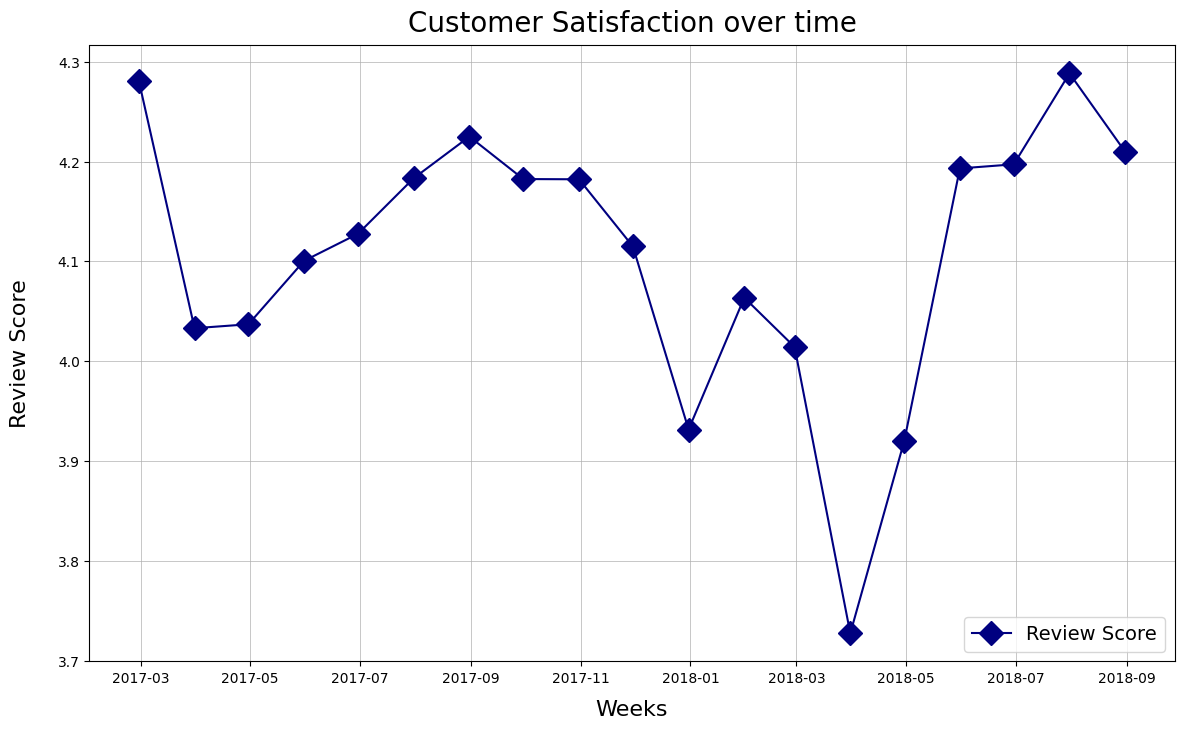

In [18]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax = plt.gca()
    # Customer Satisfaction over time

    ax.plot(reviews.loc['2017-02-01':].resample('M').agg({'review_score':'mean'}),
            color = "#000080",
            marker = "D",
            markersize = 12,
            label="Review Score")
    ax.set_xlabel("Weeks", fontsize = 16, labelpad = 10)
    ax.set_ylabel("Review Score", fontsize = 16, labelpad = 20)

    # Get a  legend
    ax.legend(loc='lower right', fontsize = 14)

    # Title
    ax.set_title('Customer Satisfaction over time', fontsize = 20, pad = 10)

    # Grid
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

### Metric 3: Shipping Delay
❓ **Are there trends in the histroical evolution of `delay_vs_expected` and `wait_time` in ***days***?**

In [19]:
orders = orders.query("order_status=='delivered'").reset_index()
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [20]:
orders['delay_vs_expected'] = (orders['order_delivered_customer_date'] -\
                               orders['order_estimated_delivery_date']) / np.timedelta64(24, 'h')

In [21]:
orders['wait_time'] = (orders['order_delivered_customer_date'] -\
                       orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')

In [22]:
orders["was_late"] = orders['delay_vs_expected'].map(lambda x: x > 0)
orders["early_or_on_time"] = orders["was_late"].map({True:"late",False:"in_time"})

In [23]:
orders["early_or_on_time"].value_counts()

in_time    88652
late        7826
Name: early_or_on_time, dtype: int64

In [24]:
round(orders["early_or_on_time"].value_counts(normalize = True),2)

in_time    0.92
late       0.08
Name: early_or_on_time, dtype: float64

✅ **On average, 8% of orders are delivered after the ETA.**  
  
❓ **Are some weeks worse than others?**

In [25]:
delay_analysis_per_week = orders.set_index('order_purchase_timestamp').resample('W').agg({
    'delay_vs_expected':np.mean,
    'wait_time':np.mean,
    'was_late':np.sum,
    'order_id':'count'})

delay_analysis_per_week.columns = ['avg_delay_vs_exp', 'avg_wait_time','nb_of_delays', 'nb_of_orders']

delay_analysis_per_week['pct_of_lateness'] = delay_analysis_per_week['nb_of_delays'] / delay_analysis_per_week['nb_of_orders']

print("-"*40)
print("Delay Analysis per week")
print("-"*40)
display(round(delay_analysis_per_week.tail(10),2))

----------------------------------------
Delay Analysis per week
----------------------------------------


,avg_delay_vs_exp,avg_wait_time,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,,,
2018-07-01,-16.78,8.33,10,1382,0.01
2018-07-08,-13.84,8.52,19,1178,0.02
2018-07-15,-9.88,11.27,59,972,0.06
2018-07-22,-10.40,9.03,65,1649,0.04
2018-07-29,-9.92,8.32,63,1610,0.04
2018-08-05,-6.57,8.66,276,2002,0.14
2018-08-12,-7.01,8.49,243,1931,0.13
2018-08-19,-8.52,7.63,133,1839,0.07
2018-08-26,-8.32,5.48,71,1054,0.07


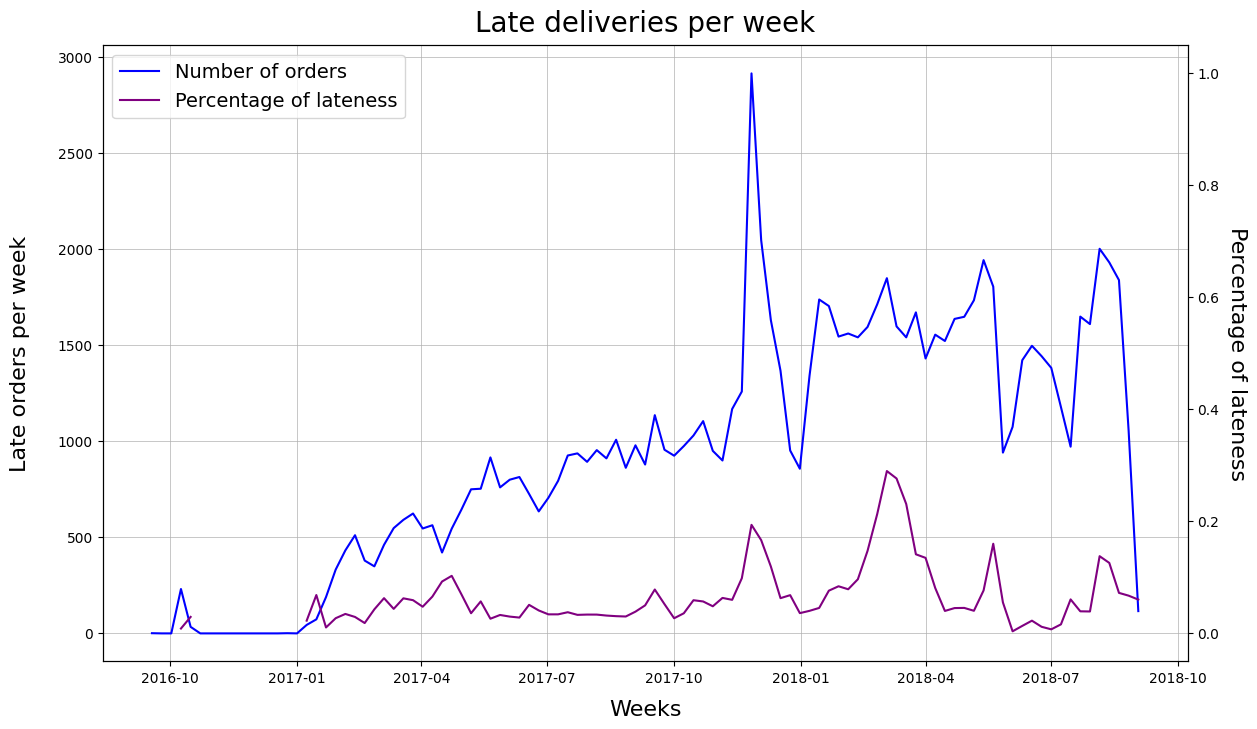

In [26]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # Weekly payments and Mean Payments

    ax1.plot(delay_analysis_per_week['nb_of_orders'],
             color="blue",
             label="Number of orders")
    ax1.set_xlabel("Weeks",
                   fontsize = 16,
                   labelpad = 10)
    ax1.set_ylabel("Late orders per week",
                   fontsize = 16,
                   labelpad = 20)

    # Numbers
    ax2.plot(delay_analysis_per_week['pct_of_lateness'],
             label="Percentage of lateness",
             c="purple")
    ax2.set_ylabel("Percentage of lateness",
                   fontsize = 16,
                   rotation = 90*3,
                   labelpad = 20)

    # Get a conjoined legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize = 14)

    # Title
    ax1.set_title('Late deliveries per week',
                  fontsize = 20,
                  pad = 10)

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis='y', linewidth=0.5)
    plt.show()

✅ **Olist experienced major lateness issues during 3-4 weeks.**

❓ **Deep dive into these peaks: Subgroups to investigate**
- 20% and more
- 15-20%
- 10-15%
- 5-10%
- 5% and less

In [27]:
round(delay_analysis_per_week[['nb_of_delays', 'nb_of_orders','pct_of_lateness']].sort_values(by = 'pct_of_lateness', ascending = False).head(10),2)

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2016-09-18,1,1,1.00
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23
2018-02-25,365,1713,0.21
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16
2018-02-18,235,1595,0.15


In [28]:
lateness_20_and_more = delay_analysis_per_week.query("pct_of_lateness >= 0.20")
display(round(lateness_20_and_more[1:][['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2018-02-25,365,1713,0.21
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23


In [29]:
lateness_15_20 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.15,0.20)]
display(round(lateness_15_20[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16


In [30]:
lateness_10_15 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.10,0.15)]
display(round(lateness_10_15[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-04-23,56,545,0.10
2017-12-10,195,1631,0.12
2018-02-18,235,1595,0.15
2018-03-25,236,1671,0.14
2018-04-01,193,1431,0.13
2018-08-05,276,2002,0.14
2018-08-12,243,1931,0.13


In [31]:
lateness_05_10 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.05,0.10)]
display(round(lateness_05_10[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-01-15,5,73,0.07
2017-03-05,29,461,0.06
2017-03-19,37,591,0.06
2017-03-26,37,624,0.06
2017-04-09,37,563,0.07
2017-04-16,39,421,0.09
2017-04-30,45,644,0.07
2017-05-14,43,753,0.06
2017-06-18,37,726,0.05


In [32]:
lateness_05_and_less = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.00,0.05)]
display(round(lateness_05_and_less[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2016-10-09,2,231,0.01
2016-10-16,1,34,0.03
2016-12-25,0,1,0.00
2017-01-08,1,44,0.02
2017-01-22,2,189,0.01
2017-01-29,9,332,0.03
2017-02-05,15,432,0.03
2017-02-12,15,511,0.03
2017-02-19,7,379,0.02


In [33]:
lateness_brackets = pd.Series([
    " ≥ 20%",
    "15% - 20%",
    "10% - 15%",
    "5% - 10%",
    " ≤ 5%"
])

lateness_numbers = pd.Series([
    lateness_20_and_more.shape[0]-1,
    lateness_15_20.shape[0],
    lateness_10_15.shape[0],
    lateness_05_10.shape[0],
    lateness_05_and_less.shape[0]

])

lateness_df = pd.concat([lateness_brackets,lateness_numbers],axis = 1)
lateness_df.columns = ['brackets', 'nb_weeks']

display(lateness_df)

,brackets,nb_weeks
0,≥ 20%,4
1,15% - 20%,3
2,10% - 15%,7
3,5% - 10%,30
4,≤ 5%,46


In [34]:
np.sum(lateness_df['nb_weeks'])

90

⚠️⚠️⚠️ **Among these 90 weeks, Olist encountered serious troubles** ⚠️⚠️⚠️
* there are 4 weeks for which more than 20% of the orders were delivered way later than expected
* there are 3 weeks for which more 15-20% of the orders were delivered way later than expected
* there are 7 weeks for which more 10-15% of the orders were delivered way later than expected